# B. Sentiment Analysis Using ANN on IMDb Movie Reviews

You are tasked with performing sentiment analysis on the IMDb movie review dataset using an Artificial Neural Network (ANN). The dataset contains movie reviews labeled as positive or negative.

## Task Requirements:
- **Design, implement, and evaluate** an ANN model to classify the sentiment of IMDb movie reviews (positive or negative).
- **Explain the preprocessing steps**, model architecture, and performance evaluation results in your submission.
- **Use one or more hidden layers** with ReLU activation and an output layer with sigmoid activation for binary classification.
- **Use the binary cross-entropy loss function** for training the model.
- Provide the **source code**, the **explanation of each step**, and **visualize the necessary EDA steps** and results.

## Key Concepts to Include:
1. **Preprocessing Steps**:
   - Data cleaning, tokenization, vectorization (e.g., using TF-IDF or word embeddings).
   - Handling missing values and ensuring balanced data.
  
2. **Model Architecture**:
   - Input layer for text reviews (converted into numeric representations).
   - One or more **hidden layers** with **ReLU activation**.
   - Output layer using **sigmoid activation** for binary classification (positive/negative sentiment).

3. **Loss Function**:
   - Use **binary cross-entropy** as the loss function since the task is binary classification.

4. **Performance Evaluation**:
   - Evaluate the model using metrics such as **accuracy, precision, recall, F1-score**, and **AUC-ROC**.

## Justifications:
- **ReLU Activation**: Chosen for hidden layers because it helps in overcoming the vanishing gradient problem and accelerates convergence in deep networks.
- **Sigmoid Activation**: Used in the output layer for binary classification tasks since it maps predictions to probabilities between 0 and 1.
- **Binary Cross-Entropy**: Suitable for binary classification as it calculates the difference between predicted probability and the actual class, ensuring an effective learning process for this task.

## Deliverables:
- **Source code** implementing the ANN model with detailed comments.
- **Visualization** of exploratory data analysis (EDA) steps such as distribution of positive and negative reviews, word cloud of frequent words, etc.
- **Explanation** of each step, including preprocessing, model architecture, training, and evaluation.


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\satch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


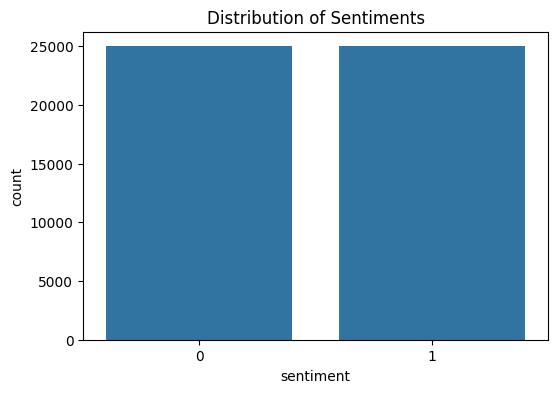

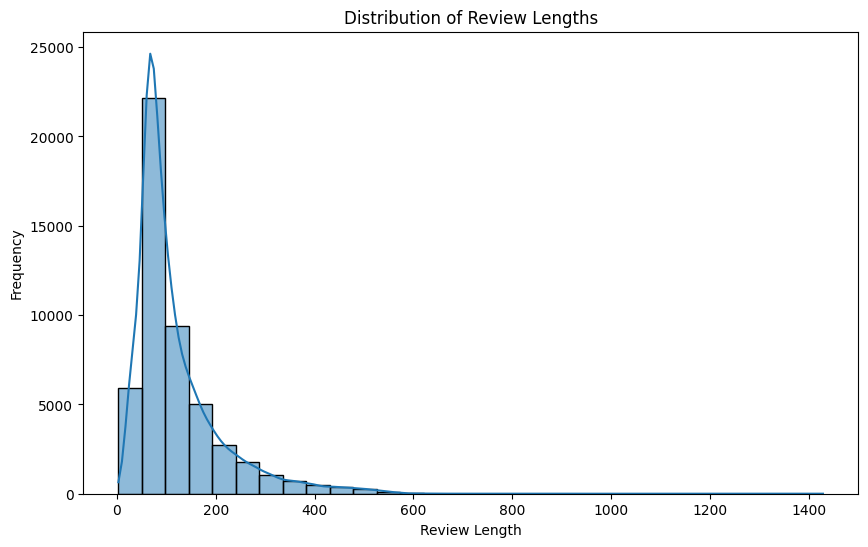

c:\Users\satch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 42ms/step - accuracy: 0.8150 - loss: 0.4040 - val_accuracy: 0.8881 - val_loss: 0.2649
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.9170 - loss: 0.2090 - val_accuracy: 0.8851 - val_loss: 0.2707
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.9510 - loss: 0.1398 - val_accuracy: 0.8815 - val_loss: 0.3063
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.9815 - loss: 0.0612 - val_accuracy: 0.8796 - val_loss: 0.3794
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.9942 - loss: 0.0227 - val_accuracy: 0.8777 - val_loss: 0.4854
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      4961
           1       0.88      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg      

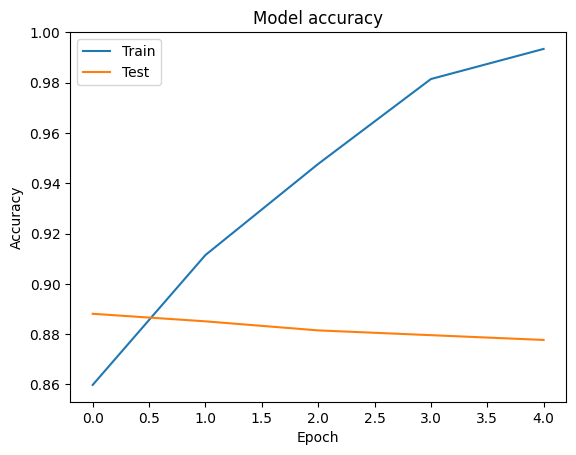

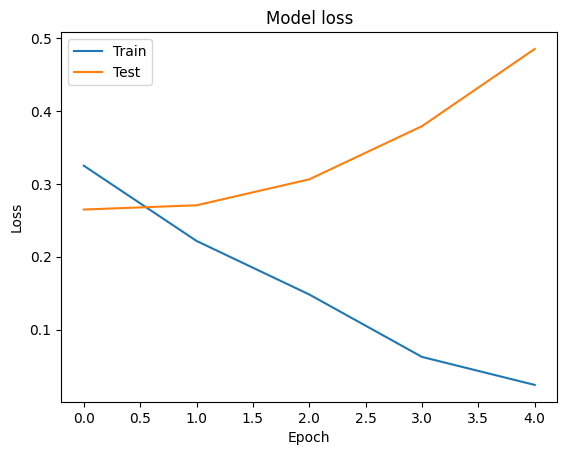

In [1]:
#2. B- Importing necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
dataset_path = 'IMDB_Dataset.csv'
df = pd.read_csv(dataset_path)

# Preview the data
print(df.head())

# Step 1: Data Preprocessing
# Clean the text data by removing punctuation, converting to lower case, etc.
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'<br />', '', text)  # Removing <br /> tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

df['review'] = df['review'].apply(clean_text)

# Convert sentiment to binary values (positive = 1, negative = 0)
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Plot sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()

# Analyze review lengths
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# Step 2: Split dataset into training and testing sets
X = df['review']
y = df['sentiment']

# Using TF-IDF Vectorizer to convert text into numerical data
tfidf = TfidfVectorizer(max_features=5000)  # Using top 5000 words
X = tfidf.fit_transform(X).toarray()

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Building the ANN model
model = Sequential()

# Input layer
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))

# Hidden layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output layer (binary classification, so we use sigmoid activation)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Step 4: Training the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Step 5: Evaluating the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 6: Visualize the training and validation accuracy
import matplotlib.pyplot as plt

# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


## Interpretation of the Graphs and Output

**1. Accuracy and Loss Graphs:**

* **Training Accuracy:** The graph shows how the model's accuracy on the training data improves over epochs.
* **Validation Accuracy:** This graph shows the model's accuracy on the testing data during training.
* **Training Loss:** Represents the model's error on the training dataset.
* **Validation Loss:** Shows the model's error on the testing dataset.

* **Interpretation:** Ideally, both training and validation accuracy should increase while training loss and validation loss should decrease. If the training accuracy increases significantly more than the validation accuracy, it might indicate overfitting. Overfitting occurs when the model performs well on the training data but poorly on unseen data.


**3. Confusion Matrix:**

* **True Positives (TP):** The number of correctly predicted positive instances.
* **True Negatives (TN):** The number of correctly predicted negative instances.
* **False Positives (FP):** The number of incorrectly predicted positive instances (Type I error).
* **False Negatives (FN):** The number of incorrectly predicted negative instances (Type II error).

* **Interpretation:** The confusion matrix gives a clear picture of the model's performance in terms of the number of correct and incorrect predictions. A well-performing model will have a high number of TP and TN and a low number of FP and FN.

**Based on the Output:**

* If the model achieves high accuracy, precision, recall, and F1-score on the test dataset, it indicates successful sentiment analysis.
* The training and validation curves give insights into potential overfitting or underfitting, helping to understand the model's behavior during training.
* The confusion matrix helps identify where the model is making mistakes (e.g., classifying many positive reviews as negative).

### Justification for ReLU and Sigmoid Activation:

- **ReLU**: Commonly used for hidden layers because it introduces non-linearity, avoids vanishing gradients, and allows faster convergence during training. ReLU also helps mitigate the vanishing gradient problem, which often occurs with deep networks, making it an efficient choice for hidden layers.

- **Sigmoid**: Appropriate for binary classification tasks, as it outputs values between 0 and 1, which can be interpreted as probabilities. This allows for a clear mapping of outputs to binary classes, making it ideal for the final layer in binary classification problems like sentiment analysis.

### Justification for Binary Cross-Entropy Loss:

- **Binary Cross-Entropy** is the ideal loss function for binary classification tasks because it evaluates the performance of models that output probabilities between 0 and 1 (as the sigmoid activation does). It penalizes incorrect predictions more heavily when the model is confident in the wrong class, helping to guide the model toward more accurate predictions.

